In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-analysis-post-covid19/day.csv


# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider RapidBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, RapidBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Importing Important Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Reading and understanding the Data

In [4]:
bikes = pd.read_csv("/kaggle/input/bike-sharing-analysis-post-covid19/day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Checking the sturcture of data

In [5]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
print("shape of dataset is" ,bikes.shape)

shape of dataset is (730, 16)


In [7]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### Inference :
   - Dataset has 730 rows and 16 columns.
   - Except one dteday column, all other are either float or integer type.
   - We will analyse the categorical variables and onvert them to as required.

### Checking for null values is the data

In [9]:
round(100*(bikes.isnull().sum()/len(bikes)),2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

There are no null values in the dataset

### Checking and removing the redundant columns

In [10]:
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


Dropping the below mentioned columns: 
- instant : It's only an index value
- dteday : This has the date, Since we already have seperate columns for 'year' & 'month', removing this column

Saving the new dataframe as "bikes_new" in order to preserve the orginal dataframe

In [11]:
drop_list = ['instant','dteday']
bikes_new = bikes.drop(drop_list, axis=1)

In [12]:
bikes_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Preperation I

In [13]:
bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


### Identification of variables

 Below mentioned variables are binary in nature:
 - yr
 - holiday

Below mentioned variables are continous in nature
 - temp
 - atemp
 - hum
 - windspeed
 - casual
 - registered
 - cnt

 #### Looking at the data, there seems to be some fields that are categorical in nature, but is integer/float type.
 
 Converting the below mentioned categorical variables to object datatype by mapping
 - season
 - weathersit
 - weekday
 - mnth

In [14]:
bikes_new['season']=bikes_new['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bikes_new['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
bikes_new['weathersit']=bikes_new['weathersit'].map({1:"clear", 2:"mist+cloudy", 3:"light_rain/snow", 4:"heavy_rain/snow"})
bikes_new['weathersit'].value_counts()

clear              463
mist+cloudy        246
light_rain/snow     21
Name: weathersit, dtype: int64

In [16]:
bikes_new['weekday']=bikes_new['weekday'].map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday",4:"Thursday", 5:"Friday", 6:"Saturday"})
bikes_new['weekday'].value_counts()

Saturday     105
Sunday       105
Monday       105
Thursday     104
Friday       104
Tuesday      104
Wednesday    103
Name: weekday, dtype: int64

In [17]:
bikes_new['mnth']=bikes_new['mnth'].map({1:"Jan", 2:"Feb", 3:"Mar",4:"Apr", 5:"May", 6:"Jun",7:"Jul", 8:"Aug", 9:"Sep",10:"Oct", 11:"Nov", 12:"Dec"})
bikes_new['mnth'].value_counts()

Aug    62
Dec    62
Mar    62
Jul    62
Jan    62
Oct    62
May    62
Nov    60
Apr    60
Sep    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [18]:
bikes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


All Categorical variables are now converted to object data type in order to convert them into dummy variables later

# Data Visualisation

### Visualising numerical variables through pairplot

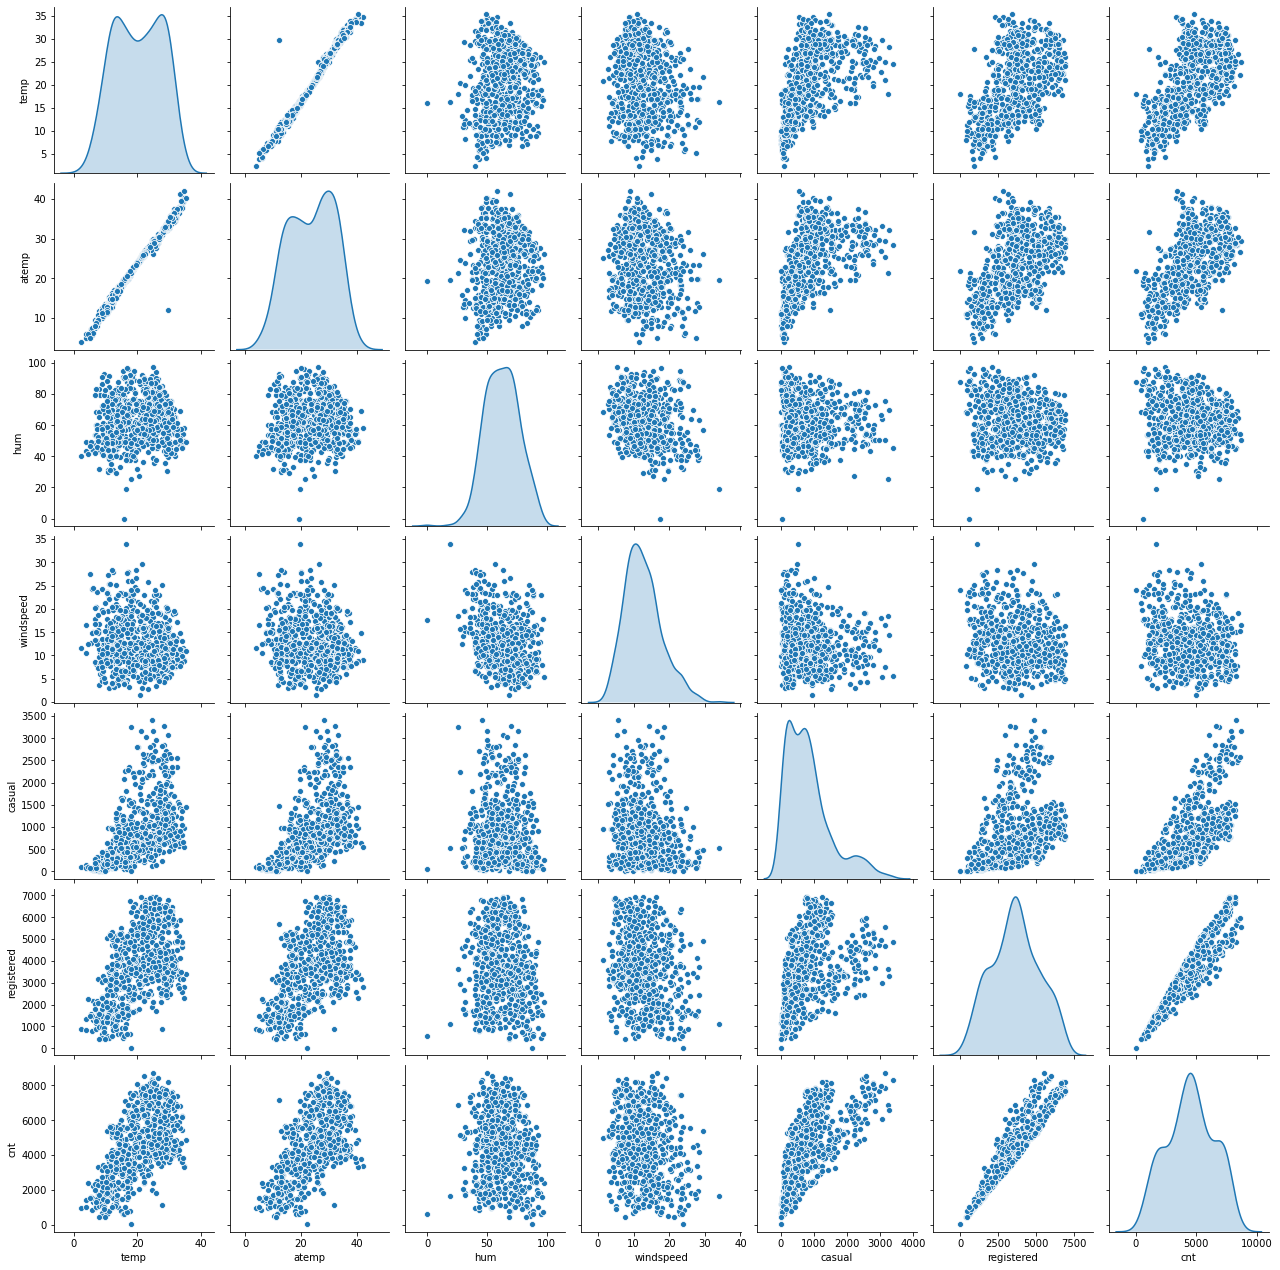

In [19]:
bikes_num=bikes_new[['temp','atemp', 'hum', 'windspeed','casual','registered','cnt']]
sns.pairplot(bikes_num, diag_kind='kde')
plt.show()

#### Inferences

 - temp and atemp shows a exact linear relationship in between them and has a linear relationship with the target variable. Further, we'll keep one of these for further analysis.
 
 - casual and registered shows a linear realtionship with target variable cnt as sum of casual and registered booking is equal to the target variable cnt. Further, we'll drop both these variables to make our model unbiased.
    
 - windspeed and hum shows a very low negative linear relationship with target variable cnt. 

### Visualising categorical variable w.r.t target variable "cnt" via boxplot

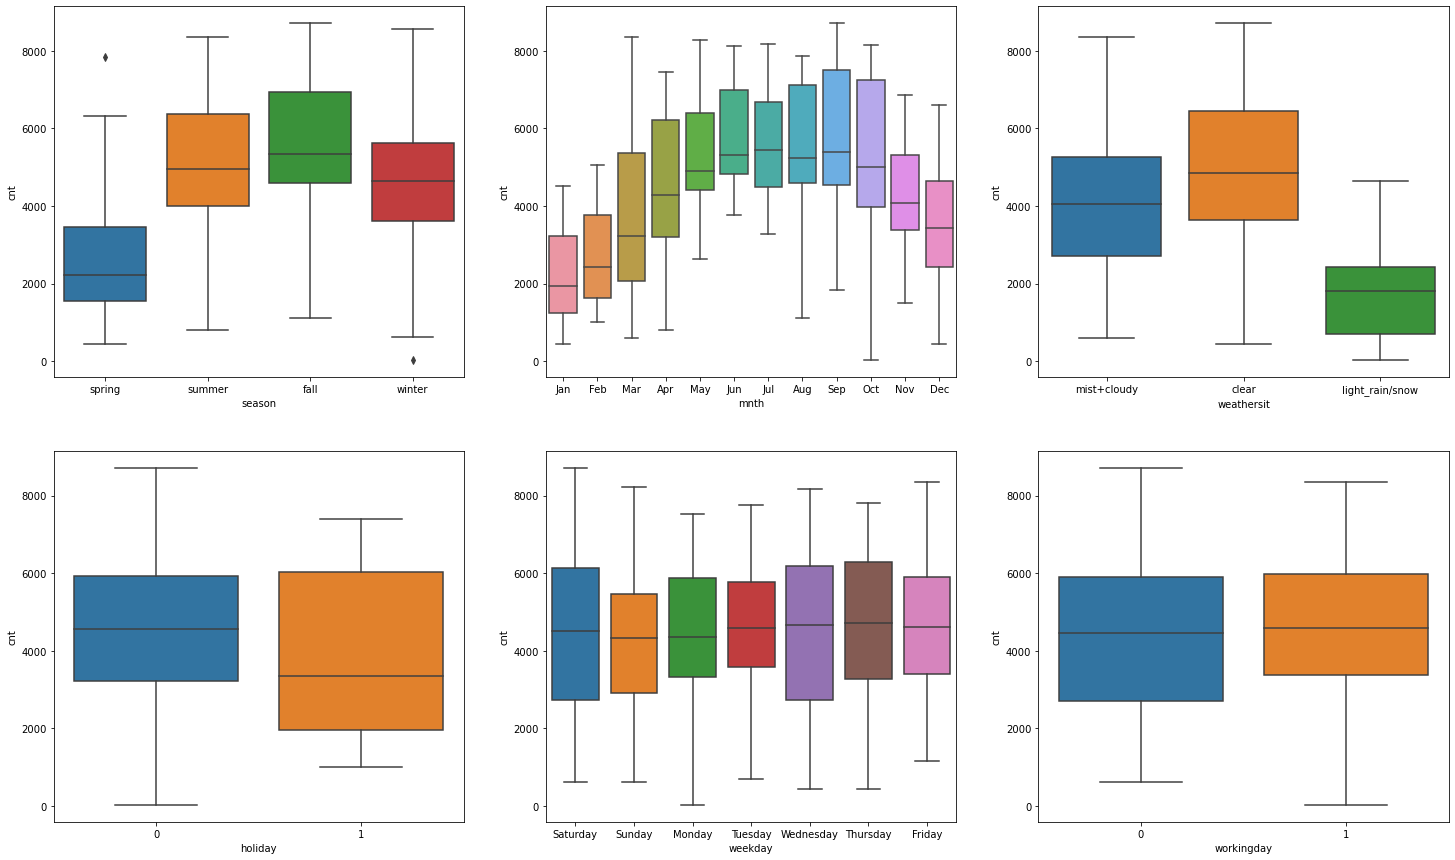

In [20]:
plt.figure(figsize=(25, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes_new)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes_new)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes_new)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes_new)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes_new)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes_new)
plt.show()

#### Inferences
There are 6 categorical variables in the dataset.

 - season: Almost 32% of the bike booking were happening in faal season with a median of approox 5000 booking. This was followed by Summer & Winter with 27% & 25% of total booking. Season can be a good predictor for the target variable.

 - mnth: Almost 10% of the bike booking were happening in the between May to September with a median of over 4000 booking per month. Mnth has some trend for bookings and can be a good predictor for the target variable.
    
 - weathersit: Almost 65% of the bike booking happened during Clear weather situation with a median of close to 5000 booking. This was followed by Misty+Cloudy weather situation with 30% of total booking. Weathersit does show some interesting trend towards the bike bookings can be a good predictor for the target variable.
    
 - holiday: Almost 97.6% of the bike booking were happening when it is not a holiday .Holiday may not be a good predictor for the target variable.
    
 - weekday: weekday variable shows very close trend (between 13% to 15% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the target variable which shall be decided further.
    
 - workingday: Almost 70% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking. workingday is an important variable but might have high correaltion with other independent variables which shall be analysed further  

### Visualising the correaltion between the variables via heatmap

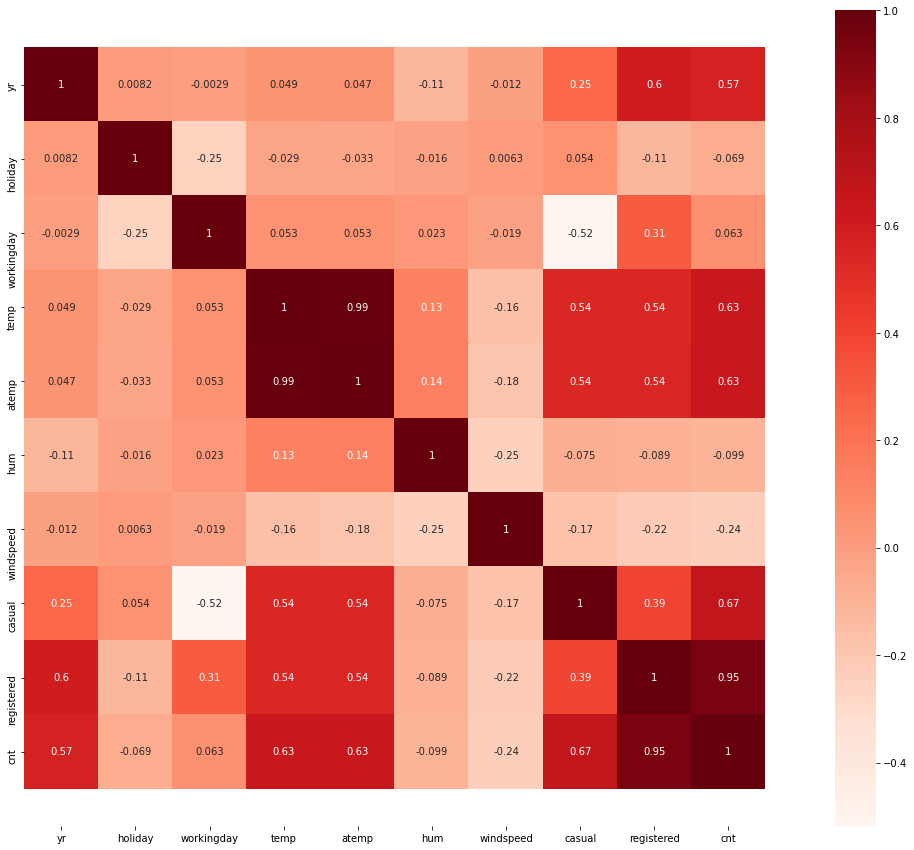

In [21]:
plt.figure(figsize = (25,15))
ax = sns.heatmap(bikes_new.corr(),square = True,annot=True, cmap="Reds")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

#### Inferences
 - Variables "casual" and "registered" are highly correlated with our target variable "cnt". The realtionship between them is CNT = Casual + Registered . Hence, dropping the casual and registered variable.
 
 - Also, the variable "temp" and "atemp" also show a very high correlation, but we'll decide which feature should be kept further in analysis via RFE and VIF

In [22]:
bikes_new = bikes_new.drop(["casual","registered"], axis=1)
bikes_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,mist+cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,mist+cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


# Data Preperation II

### Creating dummy for all the categorical variable

Below steps will be followed
 - Create Dummy variable
 - Drop original variable for which the dummy was created
 - Drop first dummy variable for each set of dummies created.

In [23]:
bikes_new = pd.get_dummies(bikes_new, drop_first=True)
bikes_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_rain/snow,weathersit_mist+cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Diving dataset into test and train

Importing tha library and diving the dataset such that 70% is allocated to train set and 30% is for test set

Choosing the random_state=14 as this will always perform the same split whenever the command is executed

In [24]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bikes_new, train_size = 0.7, test_size = 0.3, random_state = 14)

In [25]:
print("Shape of bike dataset:",bikes_new.shape)
print("Shape of training dataset :",df_train.shape)

Shape of bike dataset: (730, 30)
Shape of training dataset : (510, 30)


### Scaling for all the numerical variables

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_rain/snow,weathersit_mist+cloudy
70,0,0,0,0.336479,0.323801,0.480588,0.473275,0.242752,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
325,0,0,1,0.445508,0.449743,1.000000,0.229978,0.182352,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
37,0,0,1,0.264831,0.294803,0.683529,0.054910,0.194432,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
121,0,0,1,0.610610,0.595626,0.671765,0.384240,0.503797,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
624,1,0,1,0.650067,0.622163,0.678235,0.308586,0.787736,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [28]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_rain/snow,weathersit_mist+cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.029412,0.668627,0.539678,0.515316,0.526289,0.396868,0.517093,0.254902,0.227451,0.264706,0.078431,0.092157,0.068627,0.088235,0.084314,0.082353,0.090196,0.080392,0.098039,0.088235,0.086275,0.139216,0.152941,0.149020,0.149020,0.137255,0.131373,0.031373,0.315686
std,0.500429,0.169124,0.471169,0.230116,0.215716,0.197648,0.175679,0.221196,0.436234,0.419598,0.441610,0.269113,0.289531,0.253068,0.283915,0.278131,0.275172,0.286744,0.272166,0.297660,0.283915,0.281045,0.346511,0.360284,0.356457,0.356457,0.344454,0.338139,0.174494,0.465245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.337776,0.325042,0.381323,0.270014,0.359468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.532731,0.520207,0.517059,0.372396,0.523873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.741185,0.694241,0.675294,0.502145,0.677951,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing the dataset into X and y

In [29]:
y_train = df_train.pop('cnt')
X_train = df_train

# Data Modelling and Evaluation

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Selecting the variables via RFE

Running RFE with the output number of the variable equal to 15

In [31]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 10),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 8),
 ('mnth_Mar', False, 11),
 ('mnth_May', False, 5),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 6),
 ('weekday_Saturday', False, 2),
 ('weekday_Sunday', False, 7),
 ('weekday_Thursday', False, 15),
 ('weekday_Tuesday', False, 12),
 ('weekday_Wednesday', False, 14),
 ('weathersit_light_rain/snow', True, 1),
 ('weathersit_mist+cloudy', True, 1)]

Creating a dataframe with the columns selected via RFE

In [33]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_light_rain/snow',
       'weathersit_mist+cloudy'],
      dtype='object')

In [34]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_summer', 'mnth_Aug', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [35]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,temp,atemp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_light_rain/snow,weathersit_mist+cloudy
70,0,0.336479,0.323801,0.480588,0.473275,1,0,0,0,0,0,0,0,0,0
325,0,0.445508,0.449743,1.000000,0.229978,0,1,0,0,0,0,1,0,1,0
37,0,0.264831,0.294803,0.683529,0.054910,1,0,0,1,0,0,0,0,0,0
121,0,0.610610,0.595626,0.671765,0.384240,0,0,0,0,0,0,0,0,0,1
624,1,0.650067,0.622163,0.678235,0.308586,0,0,0,0,0,0,0,1,0,1


## Creating linear Model using Stats Model

## Linear model 1

### Checking the VIF

This will create a dataframe containing names of all the feature variables and their respective VIFs

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,354.75
1,temp,350.97
3,hum,15.32
4,windspeed,5.53
5,season_spring,4.30
6,season_winter,2.89
14,weathersit_mist+cloudy,2.41
9,mnth_Jan,2.24
0,yr,2.08
8,mnth_Feb,1.90


In [37]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [38]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.3
Date:                Fri, 07 Aug 2020   Prob (F-statistic):          1.63e-182
Time:                        06:24:48   Log-Likelihood:                 506.52
No. Observations:                 510   AIC:                            -981.0
Df Residuals:                     494   BIC:                            -913.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [39]:
#Removing the const from the dataframe and creating a new dataframe as "X_train_new"

X_train_new = X_train_rfe.drop(["const",], axis = 1)

## Linear Model 2

Removing the "atemp" feature due to high VIF and high p-value

In [40]:
X_train_new = X_train_new.drop(["atemp",], axis = 1)

Checking VIF

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,14.82
1,temp,13.62
3,windspeed,5.49
4,season_spring,4.30
5,season_winter,2.86
13,weathersit_mist+cloudy,2.39
8,mnth_Jan,2.23
0,yr,2.08
7,mnth_Feb,1.90
10,mnth_Nov,1.89


In [42]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Creating and running the linear model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.3
Date:                Fri, 07 Aug 2020   Prob (F-statistic):          1.56e-183
Time:                        06:24:48   Log-Likelihood:                 506.24
No. Observations:                 510   AIC:                            -982.5
Df Residuals:                     495   BIC:                            -919.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Linear Model 3

Removing the "windspeed" due to high VIF

In [43]:
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

Checking VIF

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,14.43
1,temp,9.60
3,season_spring,3.74
4,season_winter,2.82
12,weathersit_mist+cloudy,2.33
7,mnth_Jan,2.22
0,yr,2.06
6,mnth_Feb,1.90
9,mnth_Nov,1.83
5,mnth_Dec,1.65


In [45]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Creating and running the linear model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     178.2
Date:                Fri, 07 Aug 2020   Prob (F-statistic):          2.28e-177
Time:                        06:24:48   Log-Likelihood:                 488.84
No. Observations:                 510   AIC:                            -949.7
Df Residuals:                     496   BIC:                            -890.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Linear Model 4

Removing the "mnth_Feb" feature due to high p-value

In [46]:
X_train_new = X_train_new.drop(["mnth_Feb"], axis = 1)

Checking VIF

In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,14.28
1,temp,9.45
4,season_winter,2.78
11,weathersit_mist+cloudy,2.32
3,season_spring,2.31
0,yr,2.05
8,mnth_Nov,1.81
6,mnth_Jan,1.65
5,mnth_Dec,1.48
7,mnth_Jul,1.47


In [48]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Creating and running the linear model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     192.5
Date:                Fri, 07 Aug 2020   Prob (F-statistic):          4.42e-178
Time:                        06:24:48   Log-Likelihood:                 487.79
No. Observations:                 510   AIC:                            -949.6
Df Residuals:                     497   BIC:                            -894.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Linear Model 5

Removing the "mnth_Jan" feature due to high p-value

In [49]:
X_train_new = X_train_new.drop(["mnth_Jan"], axis = 1)

Checking VIF

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,13.96
1,temp,9.16
4,season_winter,2.77
10,weathersit_mist+cloudy,2.32
0,yr,2.05
7,mnth_Nov,1.80
3,season_spring,1.78
6,mnth_Jul,1.46
5,mnth_Dec,1.40
9,weathersit_light_rain/snow,1.37


In [51]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Creating and running the linear model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.4
Date:                Fri, 07 Aug 2020   Prob (F-statistic):          5.59e-178
Time:                        06:24:48   Log-Likelihood:                 484.77
No. Observations:                 510   AIC:                            -945.5
Df Residuals:                     498   BIC:                            -894.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Linear Model 6

Removing the "hum" feature due to high VIF

In [52]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

Checking VIF

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.96
3,season_winter,2.53
0,yr,2.03
6,mnth_Nov,1.79
9,weathersit_mist+cloudy,1.49
5,mnth_Jul,1.41
2,season_spring,1.36
4,mnth_Dec,1.36
7,mnth_Sep,1.22
8,weathersit_light_rain/snow,1.06


In [54]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Creating and running the linear model
lr6 = sm.OLS(y_train, X_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     224.7
Date:                Fri, 07 Aug 2020   Prob (F-statistic):          1.21e-177
Time:                        06:24:48   Log-Likelihood:                 481.17
No. Observations:                 510   AIC:                            -940.3
Df Residuals:                     499   BIC:                            -893.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [55]:
lr6.params

const                         0.225493
yr                            0.237066
temp                          0.420134
season_spring                -0.124774
season_winter                 0.074333
mnth_Dec                     -0.047587
mnth_Jul                     -0.078552
mnth_Nov                     -0.058535
mnth_Sep                      0.057056
weathersit_light_rain/snow   -0.264492
weathersit_mist+cloudy       -0.073738
dtype: float64

### Due to low Multicollinearity between the predictors and significant p-values, considering the linear model 6 as our final model.

# Final Model Interpretation
Hypothesis Testing:

Hypothesis testing states that:

    H0:B1=B2=...=Bn=0
    H1: at least one Bi!=0

lr6 model coefficient values

    const                         0.225493
    yr                            0.237066
    temp                          0.420134
    season_spring                -0.124774
    season_winter                 0.074333
    mnth_Dec                     -0.047587
    mnth_Jul                     -0.078552
    mnth_Nov                     -0.058535
    mnth_Sep                      0.057056
    weathersit_light_rain/snow   -0.264492
    weathersit_mist+cloudy       -0.073738
    
#### Inference
From the lr6 model summary, it is evident that all our coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS

### Checking for assumptions

 - Distribution of Error Terms

In [56]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

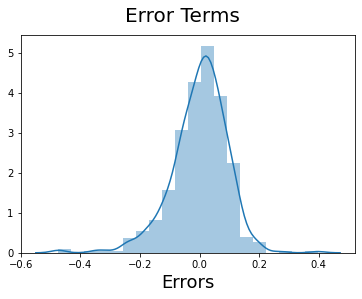

In [57]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

 - Multicollinearity 

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.96
3,season_winter,2.53
0,yr,2.03
6,mnth_Nov,1.79
9,weathersit_mist+cloudy,1.49
5,mnth_Jul,1.41
2,season_spring,1.36
4,mnth_Dec,1.36
7,mnth_Sep,1.22
8,weathersit_light_rain/snow,1.06


We conclude that this model satifies the assumptions of linerar regression as all the features have VIF > 5 denoting weak relationship in between the independent variables and error terms are normally distributed with mean zero.

### MAKING PREDICTION USING FINAL MODEL 
Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr7)

Applying the scaling on the test set

In [59]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [60]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_rain/snow,weathersit_mist+cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.027397,0.716895,0.552985,0.527308,0.529891,0.411439,0.512048,0.228311,0.310502,0.196347,0.100457,0.068493,0.095890,0.077626,0.086758,0.082192,0.073059,0.095890,0.045662,0.077626,0.068493,0.155251,0.123288,0.132420,0.127854,0.155251,0.159817,0.022831,0.388128
std,0.500722,0.163612,0.451539,0.224077,0.210415,0.209429,0.205326,0.225735,0.420705,0.463759,0.398144,0.301297,0.253169,0.295115,0.268194,0.282125,0.275286,0.260830,0.295115,0.209229,0.268194,0.253169,0.362974,0.329520,0.339723,0.334692,0.362974,0.367276,0.149707,0.488440
min,0.000000,0.000000,0.000000,0.060271,0.029650,-0.358824,0.047504,0.069144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356388,0.357004,0.363529,0.260375,0.365278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.561806,0.545046,0.541176,0.385762,0.503682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757020,0.708748,0.670882,0.509386,0.702600,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.957426,0.980934,1.014118,1.157215,0.959503,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 390 to 226
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          219 non-null    int64  
 1   holiday                     219 non-null    int64  
 2   workingday                  219 non-null    int64  
 3   temp                        219 non-null    float64
 4   atemp                       219 non-null    float64
 5   hum                         219 non-null    float64
 6   windspeed                   219 non-null    float64
 7   season_spring               219 non-null    uint8  
 8   season_summer               219 non-null    uint8  
 9   season_winter               219 non-null    uint8  
 10  mnth_Aug                    219 non-null    uint8  
 11  mnth_Dec                    219 non-null    uint8  
 12  mnth_Feb                    219 non-null    uint8  
 13  mnth_Jan                    219 n

In [62]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 390 to 226
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       219 non-null    float64
 1   yr                          219 non-null    int64  
 2   temp                        219 non-null    float64
 3   season_spring               219 non-null    uint8  
 4   season_winter               219 non-null    uint8  
 5   mnth_Dec                    219 non-null    uint8  
 6   mnth_Jul                    219 non-null    uint8  
 7   mnth_Nov                    219 non-null    uint8  
 8   mnth_Sep                    219 non-null    uint8  
 9   weathersit_light_rain/snow  219 non-null    uint8  
 10  weathersit_mist+cloudy      219 non-null    uint8  
dtypes: float64(2), int64(1), uint8(8)
memory usage: 8.6 KB


In [63]:
# Making predictions using the final model (lr6)
y_pred = lr6.predict(X_test_lm6)

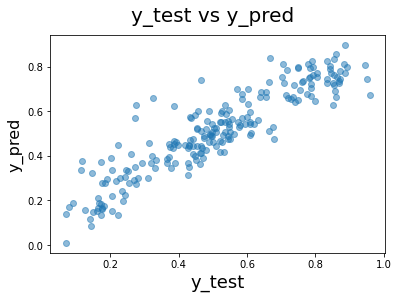

In [64]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8199435928434153

In [66]:
r2=0.8199435928434153

In [67]:
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8112870348070411

## Final Results

    Train R^2 :0.818
    Train Adjusted R^2 :0.815
    Test R^2 :0.819
    Test Adjusted R^2 :0.811

### This model seems to be really good as this fits the train and test set without much variance

# Final Report

## The equation of best fitted line based on our final 6:

 - cnt = 0.225493 + (yr × 0.237066) + (temp × 0.420134) - (season_spring × 0.124774) + (season_winter ×0.074333) -  (mnth_Dec × 0.047587) − (mnth_Jul × 0.078552) − (mnth_Nov × 0.058535) + (mnth_Sep x 0.057056) - (weathersit_light_rain/snow x 0.264492) - (weathersit_mist+cloudy x 0.073738) 

## As per our final Model, the top 3 predictor variables that influences the bike booking are:

 - Temperature (temp) : The coefficient value of ‘0.420134’ indicates that a unit increase in temp variable increases the bike renting numbers by 0.420134 units.
 - Weather Situation (weathersit_light_rain/snow): The coefficient value of ‘-0.264492’ indicates that if there is light rain or snow,bike renting numbers decreases by 0.264492 units.
 - Year (yr): A coefficient value of ‘0.2308’ indicates that the total bike renting has gone up by 23% from year 2018 to year 2019.
 
### The next important predictor features are:
  - Season : The renting goes up by 0.074333 units in the winter season whereas the renting rate falls by 0.124774 in the spring season
  - Month (mnth) : The renting goes up in the month of September by 0.057056 units whereas the renting falls in the month of July, November and December by 0.078552 , 0.058535 and 0.047587 respecitively